## 1. Import required libraries and read the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
HP_data = pd.read_csv('honeyproduction.csv')

## 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [3]:
HP_data.sample(5)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
361,MS,14000.0,98,1372000.0,453000.0,0.93,1276000.0,2006
516,IN,10000.0,43,430000.0,151000.0,2.23,959000.0,2010
539,UT,26000.0,30,780000.0,195000.0,1.53,1193000.0,2010
229,KS,16000.0,57,912000.0,447000.0,1.41,1286000.0,2003
295,UT,24000.0,70,1680000.0,554000.0,1.10,1848000.0,2004


In [4]:
HP_data.shape

(626, 8)

In [5]:
HP_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB


In [6]:
HP_data.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,626.000000,626.000000,6.260000e+02,6.260000e+02,626.000000,6.260000e+02,626.000000
mean,60284.345048,62.009585,4.169086e+06,1.318859e+06,1.409569,4.715741e+06,2004.864217
std,91077.087231,19.458754,6.883847e+06,2.272964e+06,0.638599,7.976110e+06,4.317306
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,9000.000000,48.000000,4.750000e+05,1.430000e+05,0.932500,7.592500e+05,2001.000000
50%,26000.000000,60.000000,1.533000e+06,4.395000e+05,1.360000,1.841500e+06,2005.000000
75%,63750.000000,74.000000,4.175250e+06,1.489500e+06,1.680000,4.703250e+06,2009.000000
max,510000.000000,136.000000,4.641000e+07,1.380000e+07,4.150000,6.961500e+07,2012.000000


## 3. Display the percentage distribution of the data in each year using the pie chart.

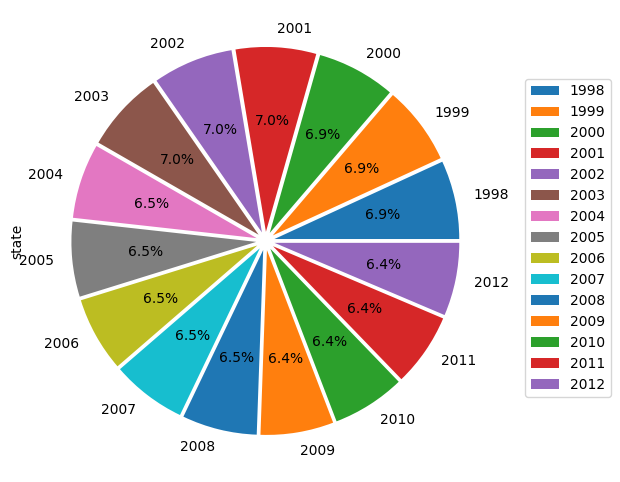

In [7]:
my_explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
HP_data.groupby('year').count()[['state']].plot(y='state',kind='pie',figsize=(6,6),autopct='%1.1f%%',explode=my_explode)
plt.legend(bbox_to_anchor=(1.1,0.5), loc="center right", fontsize=10, bbox_transform=plt.gcf().transFigure)
plt.show()

## 4. Plot and Understand the distribution of the variable "price per lb" using displot, and write your findings.


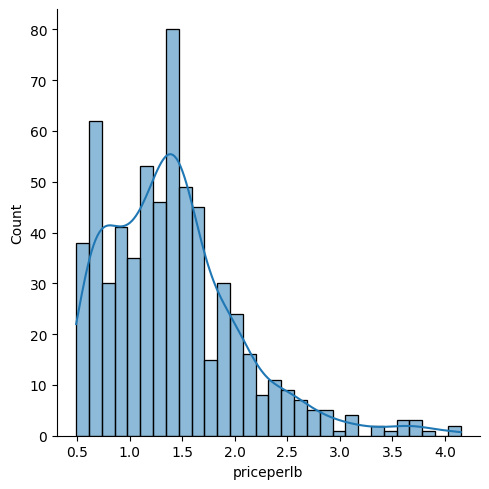

In [8]:
sns.displot(x=HP_data['priceperlb'],kind='hist', bins = 30, kde = True)
plt.show()

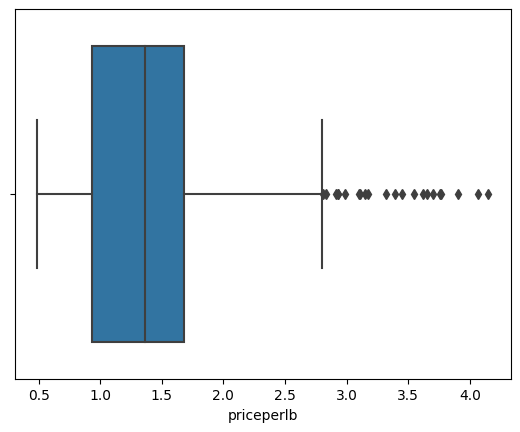

In [9]:
sns.boxplot(data=HP_data, x=HP_data['priceperlb'])
plt.show()

### Observations

- From the histogram we can observe that the data is positively skewed
- Boxplot of the data tells us that data has a huge amout of outliers

## 5. Plot and understand the relationship between the variables 'numcol' and 'prodval' through scatterplot, and write your findings.


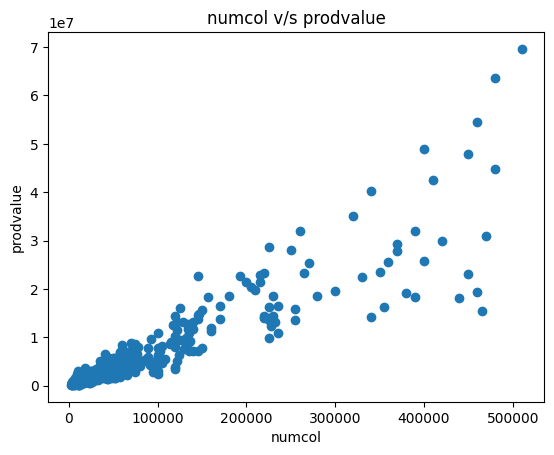

In [10]:
plt.scatter(x=HP_data['numcol'],y=HP_data['prodvalue'])
plt.title('numcol v/s prodvalue')
plt.xlabel('numcol')
plt.ylabel('prodvalue')
plt.show()

### Observations

- From the shape of the curve we can observe that as the value of numcol increases so does prodvalues, thus they are directly related (if one increases other also increases ans vice versa).

## 6. Plot and understand the relationship between categorical variable 'year' and a numerical variable 'prodvalue' through boxplot, and write your findings.

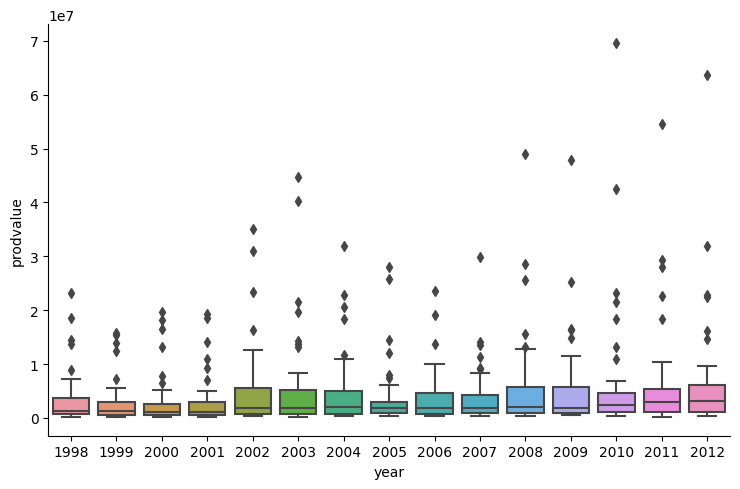

In [11]:
sns.catplot(data=HP_data, x= 'year', y= 'prodvalue',kind='box',height=5,aspect=1.5)
plt.show()

### Observations

- Every variable has outliers.
- The outliers lies after the right whisker, i.e above the maximum value.
- The median lies closer to the 1st quartile in all of the variables.

## 7. Visualize and understand the relationship between the multiple pairs of variables throughout different years using pairplot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'prodvalue','year')

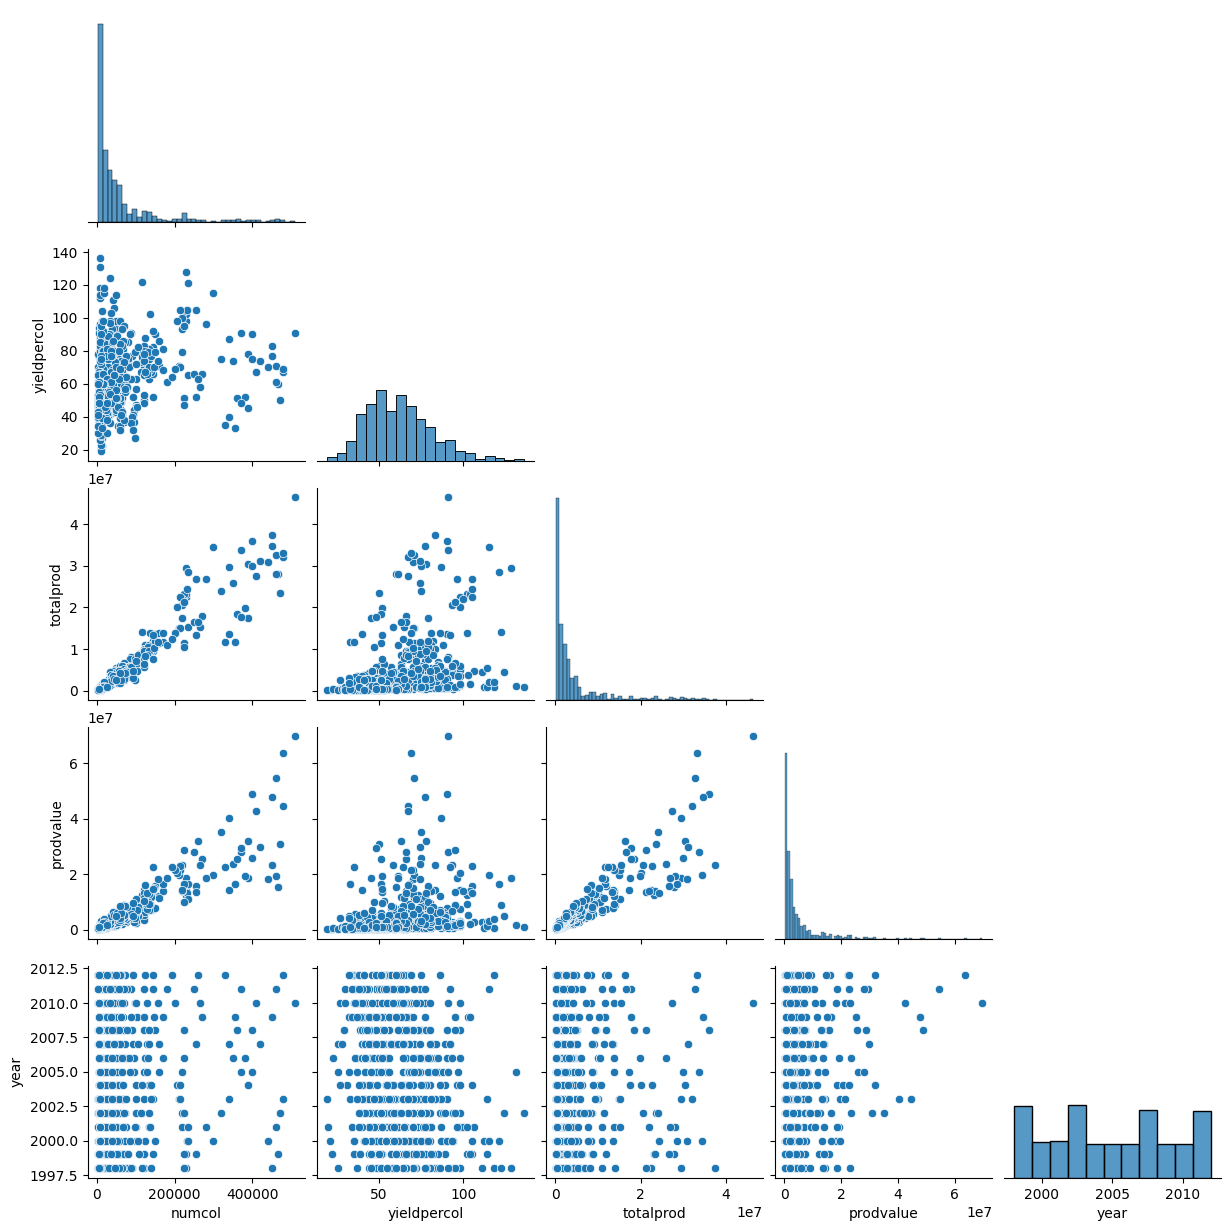

In [12]:
sns.pairplot(HP_data[['numcol', 'yieldpercol', 'totalprod', 'prodvalue','year']],corner = True);


### Inferences

- We can observe that the variable year has no significant influence over the other variables.
- The datas of 'numcol', 'totalprod' and 'prodvalue' are positively skewed.
- Datas in 'yieldpercol' seems to be normally distributed.
- The pairs 'totalprod' vs 'numcol' and 'totalprod' vs 'prodvalue' seems to be directly(positively) realted.
- While comparing 'yieldpercol' with other variables and ploting the data we can see that the data is scattered all over, thus no exact conclusion can be made

## 8. Display the correlation values using a plot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'stocks', 'price per lb', 'prodvalue')

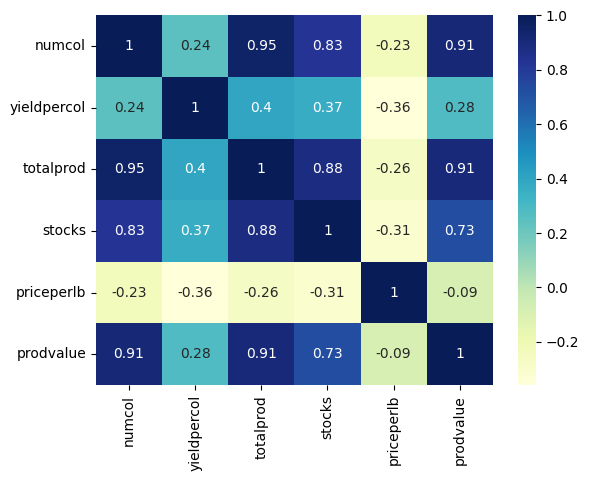

In [13]:
sns.heatmap(data=HP_data[['numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb', 'prodvalue']].corr(),annot=True,cmap='YlGnBu')
plt.show()

### Inferences

- Totalprod and numcol are strongly positively correlated, with a correalation of 0.95.
- Priceperlb and yieldpercol are weakly negatively correlated, with a corelation of -0.36.
- Except priceperlb, every pair of variables are positively corelated.
- Priceperlb has a negative corelation with every variables.